# First load the modeller package along with the environment to make fake 3d protein structures from primary sequence

In [1]:
from modeller import *

log.verbose()
env = environ()


                         MODELLER 9.25, 2020/09/03, r11894

     PROTEIN STRUCTURE MODELLING BY SATISFACTION OF SPATIAL RESTRAINTS


                     Copyright(c) 1989-2020 Andrej Sali
                            All Rights Reserved

                             Written by A. Sali
                               with help from
              B. Webb, M.S. Madhusudhan, M-Y. Shen, G.Q. Dong,
          M.A. Marti-Renom, N. Eswar, F. Alber, M. Topf, B. Oliva,
             A. Fiser, R. Sanchez, B. Yerkovich, A. Badretdinov,
                     F. Melo, J.P. Overington, E. Feyfant
                 University of California, San Francisco, USA
                    Rockefeller University, New York, USA
                      Harvard University, Cambridge, USA
                   Imperial Cancer Research Fund, London, UK
              Birkbeck College, University of London, London, UK


Kind, OS, HostName, Kernel, Processor: 4, Darwin Skynet.local 19.6.0 x86_64
Date and time of compilation     

# Prepare the Input file (the primary sequence) of which you want to create 3d structure

In [2]:
! cat TvLDH.ali

>P1;TvLDH
sequence:TvLDH:::::::0.00: 0.00
MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKA
AFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPEN
FSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKI
GHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVV
EGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG*


# Convert the Primary Sequence into profile format

In [3]:
aln = alignment(env)
aln.append(file='TvLDH.ali', alignment_format='PIR', align_codes='ALL')
prf = aln.to_profile()

openf___224_> Open           TvLDH.ali

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       256446     250.436     0.245

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       257896     251.852     0.246

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       260796     254.684     0.249

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       266596     260.348     0.254

Dynamically allocated memory at    amaxsequence [B,KiB,MiB]:       267932     261.652     0.256

Read the alignment from file       : TvLDH.ali

Total number of alignment positions:   335

  #  Code        #_Res #_Segm PDB_code    Name
-------------------------------------------------------------------------------
  1      TvLDH     335      1       TvLDH

Dynamically allocated memory at     amaxprofile [B,KiB,MiB]:       269597     263.278     0.257


# Make Sequence DataBase which will be used to pick up the homologus sequences

In [4]:
sdb = sequence_db(env)
sdb.read(seq_database_file='pdb_95.pir', seq_database_format='PIR',
         chains_list='ALL', minmax_db_seq_len=(30, 4000), clean_sequences=True)

sdb.write(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
          chains_list='ALL')

sdb.read(seq_database_file='pdb_95.bin', seq_database_format='BINARY',
         chains_list='ALL')


openf___224_> Open           pdb_95.pir

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       314211     306.847     0.300

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       901345     880.220     0.860

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       903453     882.278     0.862

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       904903     883.694     0.863

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:       907803     886.526     0.866

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:      3123602    3050.393     2.979

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      3129402    3056.057     2.984

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      3141002    3067.385     2.995

Dynamically allocated memory at   amaxalignment [B,KiB,MiB]:      3164202    3090.041     3.018

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:      4272102    4171.975 

# Search for homologous sequences then write out the alignment file

In [5]:
prf.build(sdb, matrix_offset=-450, rr_file='${LIB}/blosum62.sim.mat',
          gap_penalties_1d=(-500, -50), n_prof_iterations=1,
          check_profile=False, max_aln_evalue=0.01)
prf.write(file='build_profile.prf', profile_format='TEXT')
aln = prf.to_alignment()
aln.write(file='build_profile.ali', alignment_format='PIR')

openf___224_> Open           ${LIB}/blosum62.sim.mat
rdrrwgh_268_> Number of residue types:       21

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       590599     576.757     0.563
profile_iteration_> processing sequence:       1    335      1     0.0000000     0.0000000     0.0000000     1

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       599896     585.836     0.572
profile_iteration_> processing sequence:    1109    335      1     0.2200000     0.0001984     0.0000009  1109

Dynamically allocated memory at amaxsequence_db [B,KiB,MiB]:       607684     593.441     0.580
profile_iteration_> processing sequence:    2217    335      1     0.4600000     0.0002075     0.0000009  2217
profile_iteration_> processing sequence:    3325    335      1     0.7000000     0.0002105     0.0000009  3325
profile_iteration_> processing sequence:    4433    335      1     0.9200000     0.0002075     0.0000009  4433
profile_iteration_> processing sequence:    5541    3

In [6]:
! ls

1b8p.pdb                TvLDH.D00000001         TvLDH.ini
1bdm.pdb                TvLDH.D00000002         TvLDH.profile
Modeller Tutorial.ipynb TvLDH.D00000003         TvLDH.rsr
README.md               TvLDH.D00000004         TvLDH.sch
TvLDH-1bdmA.ali         TvLDH.D00000005         Untitled.ipynb
TvLDH-1bdmA.pap         TvLDH.V99990001         build_profile.ali
TvLDH.B99990001.pdb     TvLDH.V99990002         build_profile.prf
TvLDH.B99990002.pdb     TvLDH.V99990003         family.mat
TvLDH.B99990003.pdb     TvLDH.V99990004         pdb_95.bin
TvLDH.B99990004.pdb     TvLDH.V99990005         pdb_95.pir
TvLDH.B99990005.pdb     TvLDH.ali


# Select a template based on the sequence identity

In [7]:
! cat build_profile.prf

# Number of sequences:     30
# Length of profile  :    335
# N_PROF_ITERATIONS  :      1
# GAP_PENALTIES_1D   :   -500.0   -50.0
# MATRIX_OFFSET      : -450.0
# RR_FILE            : ${LIB}/blosum62.sim.mat
    1 TvLDH                                    S     0   335     1   335     0     0     0    0.    0.0     MSEAAHVLITGAAGQIGYILSHWIASGELYGDRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGFVATTDPKAAFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTNCEIAMLHAKNLKPENFSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEGKTQKVVDVLDHDYVFDTFFKKIGHRAWDILEHRGFTSAASPTKAAIQHMKAWLFGTAPGEVLSMGIPVPEGNPYGIKPGVVFSFPCNVDKEGKIHVVEGFKVNDWLREKLDFTEKDLFHEKEIALNHLAQGG
    2 1a5z                                     X     1   312    75   242    63   229   164   28.   0.85E-08 --------------------------------------------------------------------------ADLKGSDVVIVAAGVPQKPGETRLQLLGRNARVMKEIARNVSKYAPDSI-VIVVTNPVDV-LTYFFLKESGMDPRKFGSGTVLDTARLRTLIAQHCGFSPRSVH-VYVIGEHGDSEV-PVWSGAMIGGIPLQNMCQVCQDSKILENFAEKTKRAAYEIIERKGATHY

# From there, we pick the top 2 which have PDB id of (1b8p and 1bdm), the chain A

In [8]:
from modeller import *

env = environ()
aln = alignment(env)
for (pdb, chain) in (('1b8p', 'A'), ('1bdm', 'A')):
    m = model(env, file=pdb, model_segment=('FIRST:'+chain, 'LAST:'+chain))
    aln.append_model(m, atom_files=pdb, align_codes=pdb+chain)
aln.malign()
aln.malign3d()
aln.compare_structures()
aln.id_table(matrix_file='family.mat')
env.dendrogram(matrix_file='family.mat', cluster_cut=-1.0)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:       914827     893.386     0.872

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:       915355     893.901     0.873
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:       963955     941.362     0.919
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:       977255     954.351     0.932
openf___224_> Open           $

# Of the two pdb (1b8pA and 1bdmA), 1bdmA has better R-factor and sequence identity. Because of that we will align the primary sequence with the template

In [9]:
! ls

1b8p.pdb                TvLDH.D00000001         TvLDH.ini
1bdm.pdb                TvLDH.D00000002         TvLDH.profile
Modeller Tutorial.ipynb TvLDH.D00000003         TvLDH.rsr
README.md               TvLDH.D00000004         TvLDH.sch
TvLDH-1bdmA.ali         TvLDH.D00000005         Untitled.ipynb
TvLDH-1bdmA.pap         TvLDH.V99990001         build_profile.ali
TvLDH.B99990001.pdb     TvLDH.V99990002         build_profile.prf
TvLDH.B99990002.pdb     TvLDH.V99990003         family.mat
TvLDH.B99990003.pdb     TvLDH.V99990004         pdb_95.bin
TvLDH.B99990004.pdb     TvLDH.V99990005         pdb_95.pir
TvLDH.B99990005.pdb     TvLDH.ali


In [10]:
from modeller import *

env = environ()
aln = alignment(env)
mdl = model(env, file='1bdm', model_segment=('FIRST:A','LAST:A'))
aln.append_model(mdl, align_codes='1bdmA', atom_files='1bdm.pdb')
aln.append(file='TvLDH.ali', align_codes='TvLDH')
aln.align2d()
aln.write(file='TvLDH-1bdmA.ali', alignment_format='PIR')
aln.write(file='TvLDH-1bdmA.pap', alignment_format='PAP')

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1873529    1829.618     1.787

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1874057    1830.134     1.787
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1922657    1877.595     1.834
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      1935957    1890.583     1.846
openf___224_> Open           $

In [11]:
! ls

1b8p.pdb                TvLDH.D00000001         TvLDH.ini
1bdm.pdb                TvLDH.D00000002         TvLDH.profile
Modeller Tutorial.ipynb TvLDH.D00000003         TvLDH.rsr
README.md               TvLDH.D00000004         TvLDH.sch
TvLDH-1bdmA.ali         TvLDH.D00000005         Untitled.ipynb
TvLDH-1bdmA.pap         TvLDH.V99990001         build_profile.ali
TvLDH.B99990001.pdb     TvLDH.V99990002         build_profile.prf
TvLDH.B99990002.pdb     TvLDH.V99990003         family.mat
TvLDH.B99990003.pdb     TvLDH.V99990004         pdb_95.bin
TvLDH.B99990004.pdb     TvLDH.V99990005         pdb_95.pir
TvLDH.B99990005.pdb     TvLDH.ali


# Let us look at the alignment of the primary sequence and template

In [12]:
! cat TvLDH-1bdmA.pap

 _aln.pos         10        20        30        40        50        60
1bdmA     MKAPVRVAVTGAAGQIGYSLLFRIAAGEMLGKDQPVILQLLEIPQAMKALEGVVMELEDCAFPLLAGL 
TvLDH     MSEAAHVLITGAAGQIGYILSHWIASGELYG-DRQVYLHLLDIPPAMNRLTALTMELEDCAFPHLAGF 
 _consrvd *     *  ********* *   ** **  * *  * * ** ** **  *    ********* ***

 _aln.p   70        80        90       100       110       120       130
1bdmA     EATDDPDVAFKDADYALLVGAAPRL--QV-------NGKIFTEQGRALAEVAKKDVKVLVVGNPANTN 
TvLDH     VATTDPKAAFKDIDCAFLVASMPLKPGQVRADLISSNSVIFKNTGEYLSKWAKPSVKVLVIGNPDNTN 
 _consrvd  ** **  **** * * **   *    **       *  **   *  *   **  ***** *** ***

 _aln.pos  140       150       160       170       180       190       200
1bdmA     ALIAYKNAPGLNPRNFTAMTRLDHNRAKAQLAKKTGTGVDRIRRMTVWGNHSSIMFPDLFHAEV--DG 
TvLDH     CEIAMLHAKNLKPENFSSLSMLDQNRAYYEVASKLGVDVKDVHDIIVWGNHGESMVADLTQATFTKEG 
 _consrvd   **   *  * * **     ** ***    * * *  *       *****   *  **  *     *

 _aln.pos    210       220       230       240       250      

# Let us create 3d structure from primary amino acid sequence 

In [13]:
from modeller import *
from modeller.automodel import *
#from modeller import soap_protein_od

env = environ()
a = automodel(env, alnfile='TvLDH-1bdmA.ali',
              knowns='1bdmA', sequence='TvLDH',
              assess_methods=(assess.DOPE,
                              #soap_protein_od.Scorer(),
                              assess.GA341))
a.starting_model = 1
a.ending_model = 5
a.make()

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2364149    2308.739     2.255

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2364677    2309.255     2.255
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2413277    2356.716     2.301
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:      2426577    2369.704     2.314
openf___224_> Open           $

# Out from 5 fake model, TvLDH.B99990001.pdb has highest assessment scores with highest GA341 score.

In [14]:
from modeller import *
from modeller.scripts import complete_pdb

log.verbose()    
env = environ()
env.libs.topology.read(file='$(LIB)/top_heav.lib') # read topology
env.libs.parameters.read(file='$(LIB)/par.lib') # read parameters

# read model file
mdl = complete_pdb(env, 'TvLDH.B99990001.pdb')

# Assess with DOPE:
s = selection(mdl)   # all atom selection
s.assess_dope(output='ENERGY_PROFILE NO_REPORT', file='TvLDH.profile',
              normalize_profile=True, smoothing_window=15)

openf___224_> Open           $(LIB)/restyp.lib
openf___224_> Open           ${MODINSTALL9v25}/modlib/resgrp.lib
rdresgr_266_> Number of residue groups:        2
openf___224_> Open           ${MODINSTALL9v25}/modlib/sstruc.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     21192466   20695.768    20.211

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     21192994   20696.283    20.211
openf___224_> Open           ${MODINSTALL9v25}/modlib/resdih.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     21241594   20743.744    20.258
rdrdih__263_> Number of dihedral angle types         :        9
              Maximal number of dihedral angle optima:        3
              Dihedral angle names                   :  Alph Phi Psi Omeg chi1 chi2 chi3 chi4 chi5
openf___224_> Open           ${MODINSTALL9v25}/modlib/radii.lib

Dynamically allocated memory at   amaxlibraries [B,KiB,MiB]:     21254894   20756.732    20.270
openf___224_> Open           $

-37275.98046875

In [15]:
! ls

1b8p.pdb                TvLDH.D00000001         TvLDH.ini
1bdm.pdb                TvLDH.D00000002         TvLDH.profile
Modeller Tutorial.ipynb TvLDH.D00000003         TvLDH.rsr
README.md               TvLDH.D00000004         TvLDH.sch
TvLDH-1bdmA.ali         TvLDH.D00000005         Untitled.ipynb
TvLDH-1bdmA.pap         TvLDH.V99990001         build_profile.ali
TvLDH.B99990001.pdb     TvLDH.V99990002         build_profile.prf
TvLDH.B99990002.pdb     TvLDH.V99990003         family.mat
TvLDH.B99990003.pdb     TvLDH.V99990004         pdb_95.bin
TvLDH.B99990004.pdb     TvLDH.V99990005         pdb_95.pir
TvLDH.B99990005.pdb     TvLDH.ali


# Visualize the results 3d Protein

In [16]:
import nglview
view = nglview.show_structure_file('TvLDH.B99990001.pdb')

In [17]:
view

NGLWidget()

In [18]:
view.render_image();

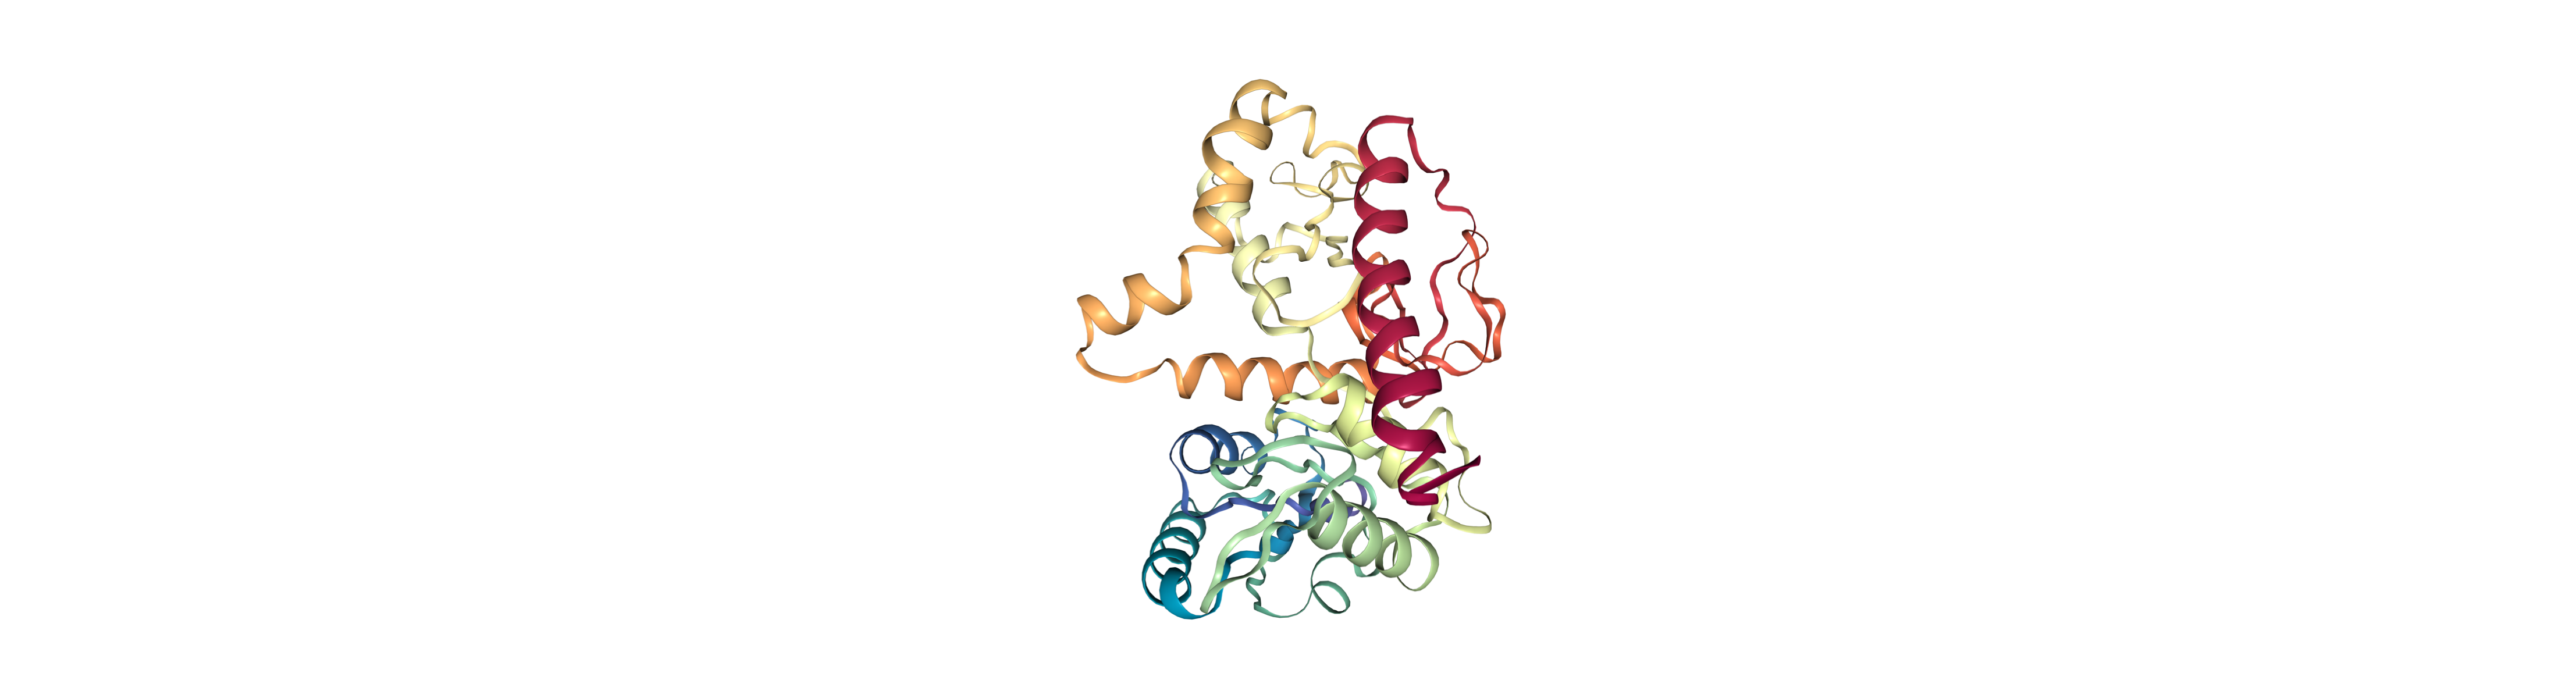

In [20]:
view._display_image()